# Ejercicio 3

Implementar un clasificador de texto utilizando el clasificador ingenuo de Bayes. Utilizar
el conjunto de datos ”Noticias Argentinas” para clasificar cada noticia según su tipo.  
a) Utilizar al menos 4 categorı́as. Dividir el conjunto de textos disponible para utilizar
una parte de los mismos como conjunto de entrenamiento y otro como conjunto test.  
b) Construir la matriz de confusión.  
c) Calcular las medidas de evaluación Accuracy, Precision, tasa de verdaderos positivos,
tasa de falsos positivos y F 1 -score.  
d ) Calcular la curva ROC.  

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from ejercicio2_helper import BernoulliNaiveBayes as BNV_ej3

In [2]:
df = pd.read_excel("Noticias_argentinas.xlsx")

In [3]:
df = df[["titular","categoria"]]

In [4]:
df.head()

,titular,categoria
0,Trabajadores del Buenos Aires Design cortan la...,Nacional
1,La boda del gobernador Gerardo Morales: tapas ...,Nacional
2,Cumbre del G20: qué calles estarán cortadas y ...,Nacional
3,Una fractura que confirma la candidatura de Cr...,Nacional
4,Infierno grande: ola de divorcios en un pueblo...,Nacional


In [5]:
#veo qué categorías hay en los datos, teníamos que sacar las noticias destacadas
label_names = df["categoria"].unique()
print(label_names)

['Nacional' 'Destacadas' 'Deportes' 'Salud' 'Ciencia y Tecnologia'
 'Entretenimiento' 'Economia' 'Internacional' nan 'Noticias destacadas']


In [6]:
df = df[df["categoria"]!="Noticias destacadas"]
df = df[df["categoria"]!="Destacadas"]
df = df.dropna()

In [49]:
label_names = df["categoria"].unique()
df["categoria"].unique()

array(['Nacional', 'Deportes', 'Salud', 'Ciencia y Tecnologia',
       'Entretenimiento', 'Economia', 'Internacional'], dtype=object)

In [47]:
# Cantidad de titulares resultantes
len(df)

26961

In [48]:
# Cantidad de artículos por clase
df["categoria"].value_counts()

Nacional                3860
Ciencia y Tecnologia    3856
Deportes                3855
Entretenimiento         3850
Economia                3850
Internacional           3850
Salud                   3840
Name: categoria, dtype: int64

In [10]:
textos = list(df["titular"])
labels = list(df["categoria"])

In [11]:
from sklearn.model_selection import train_test_split
import random

In [18]:
train_size = 0.8
N_train = int(train_size*len(textos))
indexes = list(range(len(textos)))
random.shuffle(indexes)
indexes_train = indexes[:N_train]
indexes_test = indexes[N_train:]
x_train = [textos[idx] for idx in indexes_train]
y_train = [labels[idx] for idx in indexes_train]
x_test = [textos[idx] for idx in indexes_test]
y_test = [labels[idx] for idx in indexes_test]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(textos, labels, test_size = 0.2, shuffle=True, stratify=labels)

# Construcción del vocabulario

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [20]:
vectorizer = CountVectorizer()

In [21]:
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [22]:
x_train_vec = 1*(x_train_vec>0).todense()
x_test_vec = 1*(x_test_vec>0).todense()

In [23]:
# veamos cómo se transforma una oración
total = vectorizer.transform([x_train[0]])

In [24]:
x_train[0]

'Charla sobre lactancia y VIH-SIDA'

In [25]:
print(total)

  (0, 2335)	1
  (0, 6913)	1
  (0, 10972)	1
  (0, 11073)	1
  (0, 12267)	1


In [27]:
print(vectorizer.get_feature_names()[6913])

lactancia


In [28]:
datos_train = pd.DataFrame(x_train_vec, columns=vectorizer.vocabulary_)
datos_train["categoria"] = y_train 
datos_test = pd.DataFrame(x_test_vec, columns=vectorizer.vocabulary_)
datos_test["categoria"] = y_test

In [29]:
clf_ej3 = BNV_ej3(smoothing=1)
clf_sklearn=BernoulliNB(alpha=1)

In [30]:
clf_ej3.fit(datos_train, "categoria")
clf_sklearn.fit(datos_train.drop(columns="categoria"),datos_train["categoria"])

BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

In [31]:
print("Prioris obtenidas por nuestro modelo")
print(clf_ej3.log_prioris)
print("Prioris obtenidas por sklearn")
print(clf_sklearn.classes_,clf_sklearn.class_log_prior_)

Prioris obtenidas por nuestro modelo
{'Salud': -1.9492074932712113, 'Economia': -1.9430396438202424, 'Entretenimiento': -1.943363320793452, 'Internacional': -1.9427160715799172, 'Nacional': -1.9440109892098743, 'Deportes': -1.9417459825790222, 'Ciencia y Tecnologia': -1.9573814802569265}
Prioris obtenidas por sklearn
['Ciencia y Tecnologia' 'Deportes' 'Economia' 'Entretenimiento'
 'Internacional' 'Nacional' 'Salud'] [-1.95738148 -1.94174598 -1.94303964 -1.94336332 -1.94271607 -1.94401099
 -1.94920749]


In [32]:
print("Las probabilidades de cada clase para cada observación, según nuestro modelo:")
print(clf_ej3.predict_proba(datos_test.loc[:10]), end="\n\n\n")
print("Las probabilidades de cada clase para cada observación, según sklearn:")
print(clf_sklearn.predict_proba(datos_test.loc[:10].drop(columns="categoria")))

Las probabilidades de cada clase para cada observación, según nuestro modelo:
           Salud      Economia  Entretenimiento  Internacional      Nacional  \
0   5.146307e-15  3.798909e-16     1.000000e+00   2.311708e-13  8.076526e-16   
1   7.852938e-08  2.402330e-08     8.667824e-11   4.544076e-11  3.150469e-10   
2   7.693636e-07  9.999320e-01     2.089145e-07   1.551646e-07  1.246049e-07   
3   5.174566e-10  5.860309e-08     1.402714e-08   8.020902e-09  8.495598e-09   
4   1.106315e-08  9.999963e-01     1.680805e-07   1.010853e-06  2.381609e-06   
5   7.391835e-06  6.325812e-07     3.400408e-05   6.495574e-02  9.328514e-01   
6   9.495407e-10  7.360515e-06     1.168476e-04   9.966511e-01  2.490170e-03   
7   7.039247e-06  3.357682e-05     8.786558e-05   7.349002e-06  1.616744e-05   
8   3.046080e-02  2.368789e-02     3.757959e-03   6.826770e-03  9.685985e-03   
9   3.038910e-06  9.997733e-01     1.568889e-07   1.034559e-06  1.628857e-06   
10  4.403769e-08  1.677741e-04     2.51864

In [33]:
y_test_pred_proba = clf_ej3.predict_proba(datos_test)

In [34]:
y_test_pred = list(y_test_pred_proba.idxmax(axis=1))

# Accuracy

In [40]:
# Calculo el Accuracy del modelo
(np.array(y_test_pred) == np.array(y_test)).mean()

0.9517893565733359

# Matriz de confusión

In [41]:
confusion_matrix=dict()
for pred, true in zip(y_test_pred, y_test):
    if (pred,true) not in confusion_matrix:
        confusion_matrix[(pred,true)]=1
    else:
        confusion_matrix[(pred,true)]+=1

In [42]:
len(confusion_matrix)

47

In [45]:
label_names

array(['Nacional', 'Destacadas', 'Deportes', 'Salud',
       'Ciencia y Tecnologia', 'Entretenimiento', 'Economia',
       'Internacional', nan, 'Noticias destacadas'], dtype=object)

In [50]:
print("pre/tru ", end="")
[print(label_true[:6],end="\t") for label_true in label_names]
print()
for label_pred in label_names:
    print(label_pred[:6], end="\t")
    for label_true in label_names:
        print(confusion_matrix.get((label_pred, label_true),0), end="\t")
    print()

pre/tru Nacion	Deport	Salud	Cienci	Entret	Econom	Intern	
Nacion	720	2	1	1	10	4	37	
Deport	6	735	2	1	6	0	5	
Salud	8	2	753	6	4	6	7	
Cienci	0	2	2	785	2	12	8	
Entret	8	12	1	1	729	3	6	
Econom	12	2	6	14	2	729	14	
Intern	19	6	4	2	8	6	682	


# Precision de cada clase
## Macro-Average Precision

In [51]:
TP=dict()
PP=dict()
for label_pred in label_names:
    TP[label_pred] = confusion_matrix.get((label_pred, label_pred),0)
    PP[label_pred] = 0
    for label_true in label_names:
        PP[label_pred] += confusion_matrix.get((label_pred, label_true),0)

In [52]:
precisions = {label:TP[label]/PP[label] for label in label_names}

In [53]:
print(precisions)

{'Nacional': 0.9290322580645162, 'Deportes': 0.9735099337748344, 'Salud': 0.9580152671755725, 'Ciencia y Tecnologia': 0.967940813810111, 'Entretenimiento': 0.9592105263157895, 'Economia': 0.9358151476251605, 'Internacional': 0.938101788170564}


In [99]:
#Chequeo de la precision de la clase Nacional
720/(720+2+1+1+10+4+37)

0.9290322580645162

In [55]:
#Macro-Average Precision
sum(list(precisions.values()))/len(label_names)

0.9516608192766497

## Micro-Average Precision

In [56]:
#SUM(TP)/SUM(PP)
sum(list(TP.values()))/sum(list(PP.values()))

0.9517893565733359

# Recall de cada clase
## Macro-Average Recall

In [57]:
TP=dict()
P=dict()
for label_true in label_names:
    TP[label_true] = confusion_matrix.get((label_true, label_true),0)
    P[label_true] = 0
    for label_pred in label_names:
        P[label_true] += confusion_matrix.get((label_pred, label_true),0)

In [58]:
recalls = {label:TP[label]/P[label] for label in label_names}

In [59]:
print(recalls)

{'Nacional': 0.9314359637774903, 'Deportes': 0.9658344283837057, 'Salud': 0.9791937581274383, 'Ciencia y Tecnologia': 0.9691358024691358, 'Entretenimiento': 0.9579500657030223, 'Economia': 0.9592105263157895, 'Internacional': 0.8985507246376812}


In [60]:
#Chequeo de la precision de la clase Nacional
710/(710+8+8+0+7+18+21)

0.9196891191709845

In [61]:
#Macro-Average Recall
sum(list(recalls.values()))/len(label_names)

0.951615895630609

## Micro-Average Recall

In [62]:
#SUM(TP)/SUM(P)
sum(list(TP.values()))/sum(list(P.values()))

0.9517893565733359

# F1-score de cada clase
## Macro-Average F1-Score

In [63]:
f1scores= {label:(2*(precisions[label]*recalls[label])/(precisions[label]+recalls[label])) for label in label_names}

In [64]:
print(f1scores)

{'Nacional': 0.9302325581395348, 'Deportes': 0.9696569920844327, 'Salud': 0.9684887459807073, 'Ciencia y Tecnologia': 0.9685379395434917, 'Entretenimiento': 0.9585798816568049, 'Economia': 0.9473684210526315, 'Internacional': 0.917900403768506}


In [65]:
#Macro-Average F1-Score
sum(list(f1scores.values()))/len(label_names)

0.9515378488894441

Se verifica correctamente que Micro-Average Recall = Micro-Average Precision = Accuracy = Micro-Average F1-Score

# FPR de cada clase

In [66]:
print("pre/tru ", end="")
[print(label_true[:6],end="\t") for label_true in label_names]
print()
for label_pred in label_names:
    print(label_pred[:6], end="\t")
    for label_true in label_names:
        print(confusion_matrix.get((label_pred, label_true),0), end="\t")
    print()

pre/tru Nacion	Deport	Salud	Cienci	Entret	Econom	Intern	
Nacion	720	2	1	1	10	4	37	
Deport	6	735	2	1	6	0	5	
Salud	8	2	753	6	4	6	7	
Cienci	0	2	2	785	2	12	8	
Entret	8	12	1	1	729	3	6	
Econom	12	2	6	14	2	729	14	
Intern	19	6	4	2	8	6	682	


In [67]:
FP=dict()
for label in label_names:
    FP[label] = sum([confusion_matrix.get((label, aux_label),0) for aux_label in label_names if aux_label != label])
TN=dict()
for label in label_names:
    TN[label]=0
    for aux_label1 in label_names:
        for aux_label2 in label_names:
            if aux_label1 != label and aux_label2 !=label:
                TN[label] += confusion_matrix.get((aux_label1, aux_label2),0)

In [68]:
FP

{'Nacional': 55,
 'Deportes': 20,
 'Salud': 33,
 'Ciencia y Tecnologia': 26,
 'Entretenimiento': 31,
 'Economia': 50,
 'Internacional': 45}

In [69]:
TN

{'Nacional': 4565,
 'Deportes': 4612,
 'Salud': 4591,
 'Ciencia y Tecnologia': 4557,
 'Entretenimiento': 4601,
 'Economia': 4583,
 'Internacional': 4589}

In [70]:
FPRs= {label:FP[label]/(FP[label]+TN[label]) for label in label_names}

In [71]:
print(FPRs)

{'Nacional': 0.011904761904761904, 'Deportes': 0.004317789291882556, 'Salud': 0.007136678200692042, 'Ciencia y Tecnologia': 0.005673139864717434, 'Entretenimiento': 0.006692573402417962, 'Economia': 0.010792143319663286, 'Internacional': 0.009710832973672853}


## Macro-Average FPR

In [72]:
#Macro-Average FPR
sum(list(FPRs.values()))/len(label_names)

0.008032559851115433

## Micro-Average FPR

In [73]:
sum(list(FP.values()))/(sum(list(FP.values()))+sum(list(TN.values())))

0.008035107237777365

# Curva ROC

Para armar la curva ROC de un problema de clasificación multiclase hay que:

elegir el esquema que se utilizará: OVO vs OVR  
OVO: K\*(K+1)/2 clasificadores binarios  
OVR: K clasificadores binarios  

Luego hay que levantar la curva ROC para cada uno de los clasificadores, resamplear las curvas y luego hacer un promedio, ya sea ponderado por la prevalencia de clase (Micro Average ROC) o sin ponderar (Macro Average ROC).  
No lo voy a hacer a mano, ya que hasta acá llega mi entusiasmo.

Para cumplir con el punto, voy a convertir el problema de clasificación multiclase en un problema de clasificación binario:
Noticias Nacionales vs El Resto.

Por lo que voy a filtrar solamente las columnas pertenecientes a las probabilidades de las Noticias Nacionales.

In [85]:
y_test_bin_proba = list(y_test_pred_proba["Nacional"])

In [86]:
y_test_bin_true = list(1*(datos_test["categoria"]=="Nacional"))

In [87]:
y_test_bin_proba[:5]

[8.076525775049838e-16,
 3.150468810475736e-10,
 1.2460493557109566e-07,
 8.495597906338685e-09,
 2.381608887507633e-06]

In [88]:
y_test_bin_true[:5]

[0, 0, 0, 0, 0]

In [89]:
def get_fpr_tpr(y_preds, y_trues, th):
    y_preds = np.array(y_preds)
    y_preds = 1*(y_preds > th)
    TN=0
    FN=0
    TP=0
    FP=0
    for y_pred, y_true in zip(y_preds, y_trues):
        if (y_pred and y_true):
            TP += 1
        if (y_pred and not y_true):
            FP += 1
        if (not y_pred and y_true):
            FN += 1
        if (not y_pred and not y_true):
            TN += 1
    FPR = FP/(FP+TN)
    TPR = TP/(FN+TP)
    return FPR, TPR

In [90]:
FPRs=list()
TPRs=list()
for th in np.linspace(0,1,1000):
    FPR, TPR = get_fpr_tpr(y_test_bin_proba,y_test_bin_true,th)
    FPRs.append(FPR)
    TPRs.append(TPR)

In [92]:
get_fpr_tpr(y_test_bin_proba,y_test_bin_true,0.1)

(0.025974025974025976, 0.9650711513583441)

In [93]:
from matplotlib import pyplot as plt
from sklearn.metrics import auc

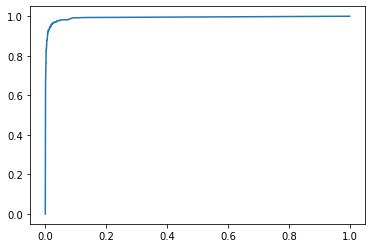

In [94]:
plt.plot(FPRs,TPRs)
plt.show()

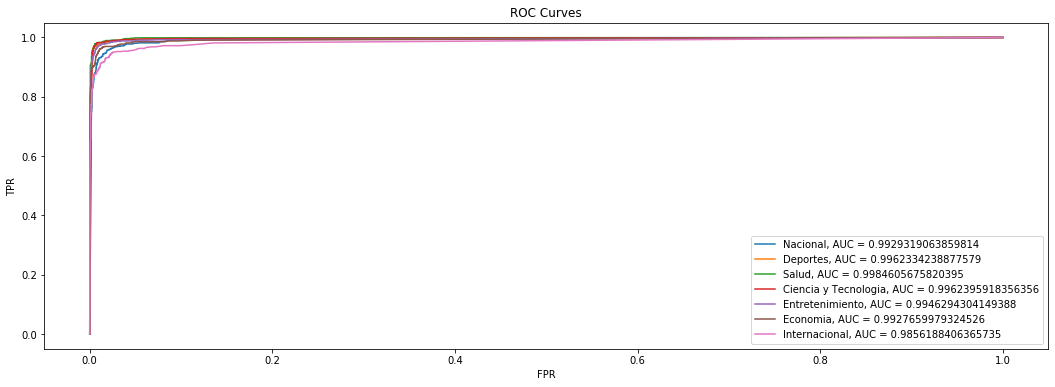

In [96]:
FPRs = dict()
TPRs = dict()
aucs = dict()
plt.figure(figsize=[18,6])
for label in label_names:
    FPRs[label] = []
    TPRs[label] = []
    y_test_bin_proba = list(y_test_pred_proba[label])
    y_test_bin_true = list(1*(datos_test["categoria"]==label))
    for th in np.linspace(0,1,1000):
        FPR, TPR = get_fpr_tpr(y_test_bin_proba,y_test_bin_true,th)
        FPRs[label].append(FPR)
        TPRs[label].append(TPR)
    aucs[label] = auc(FPRs[label],TPRs[label])
    plt.plot(FPRs[label],TPRs[label], label=f'{label}, AUC = {aucs[label]}')
plt.legend()
plt.title("ROC Curves")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [97]:
# Macro-Average AUC-ROC
sum(list(aucs.values()))/len(label_names)

0.9938399655250542